#  Graph based -  Deezer Ego Nets dataset


# Data Preprocessing

### To download the dataset run the two next cells

In [ ]:
%%capture
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1X3mcKDQAClNGKkkyZP54YohxinB8E4rI

In [ ]:
!unzip deezer_ego_nets.zip

### If you already have the data set, define the path to the folder under the ״folder״ variable

In [ ]:
folder = 'deezer_ego_nets'

In [1]:
import zipfile
import pandas as pd
import numpy as np
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import zipfile
import pandas as pd
import os
import networkx as nx
from operator import itemgetter
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

### Graph labels

In [2]:
graph_label = pd.read_csv(f'{folder}/deezer_target.csv',
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True,header=0)
graph_label.head()

,id,target
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


### Lets show the first 3 graphs in our dataset

Ego_node= 2 Ego_degree= 286


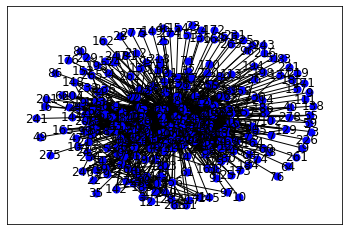

Ego_node= 6 Ego_degree= 17


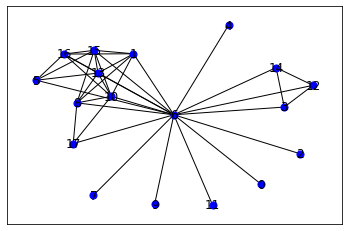

Ego_node= 1 Ego_degree= 42


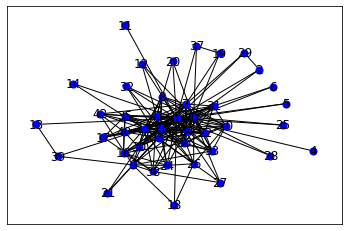

In [3]:
with open(f'{folder}/deezer_edges.json', "r") as json_file:
    social_net = json.load(json_file)
for i in range(3):
    edge_list = social_net[str(i)]
    G = nx.Graph()
    G.add_edges_from(edge_list)
    # find node with largest degree
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    print("Ego_node=",largest_hub,"Ego_degree=",degree)
    # Draw graph
    pos = nx.spring_layout(G)  
    nx.draw_networkx(G, pos, node_color="b", node_size=50, with_labels=True)

    plt.show()

In [4]:
target_df = pd.read_csv(f'{folder}/deezer_target.csv')
target_df.head()

,id,target
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


### Convert JSON edge data to NetworkX graph

In [ ]:
edges_dict = json.load(open(f'{folder}/deezer_edges.json'))

In [6]:
graph_dic = {}
for graph_key, edges in edges_dict.items():
    graph = nx.Graph()
    for edge in edges:
        graph.add_edge(edge[0], edge[1])
    graph_dic[graph_key] = graph

In [7]:
target_df.values.shape

(9629, 2)

In [8]:
len(graph_dic.keys())

9629

### Generate feature matrix using NetworkX graph

In [9]:
# Define the graph features to be extracted
feature_functions = {
    "degree_centrality": nx.degree_centrality,
    "betweenness_centrality": nx.betweenness_centrality,
    "closeness_centrality": nx.closeness_centrality,
    "eigenvector_centrality": nx.eigenvector_centrality,
    "clustering_coefficient": nx.clustering
}

def extract_features(graph):
    features = {}
    for feature_name, feature_function in feature_functions.items():
        feature_values = pd.Series(feature_function(graph))
        feature_mean = feature_values.mean()
        feature_std = feature_values.std()
        features[feature_name + "_mean"] = feature_mean
        features[feature_name + "_std"] = feature_std
    return pd.Series(features)

In [17]:
graph_features_df = pd.concat([extract_features(graph).to_frame(graph_num) for graph_num, graph in graph_dic.items()], axis=1).T

In [22]:
graph_features_df.values.shape

(9629, 10)

In [23]:
graph_features_df

,degree_centrality_mean,degree_centrality_std,betweenness_centrality_mean,betweenness_centrality_std,closeness_centrality_mean,closeness_centrality_std,eigenvector_centrality_mean,eigenvector_centrality_std,clustering_coefficient_mean,clustering_coefficient_std
0,0.040667,0.074327,0.003366,0.045664,0.511553,0.032143,0.042326,0.041215,0.549899,0.325341
1,0.254902,0.231808,0.046569,0.187581,0.586747,0.112351,0.196895,0.133325,0.563484,0.451422
2,0.220377,0.205547,0.019015,0.077405,0.571872,0.090635,0.125731,0.087321,0.729279,0.261127
3,0.485380,0.270169,0.030272,0.083896,0.681264,0.127333,0.207833,0.099806,0.674459,0.334061
4,0.161905,0.239147,0.064469,0.245164,0.558927,0.123267,0.224261,0.132450,0.235531,0.415672
...,...,...,...,...,...,...,...,...,...,...
9624,0.113333,0.189999,0.038551,0.190498,0.539336,0.096766,0.169775,0.107899,0.408116,0.480095
9625,0.173684,0.209902,0.045906,0.201536,0.559024,0.106467,0.188314,0.123705,0.677427,0.452653
9626,0.242424,0.243112,0.075758,0.259582,0.585547,0.131269,0.262073,0.126424,0.729798,0.432902
9627,0.218182,0.263887,0.086869,0.288111,0.580011,0.140029,0.270489,0.139712,0.367677,0.501490


In [24]:
# Scale the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(graph_features_df)

# Kmeans without PCA


In [25]:
# Train unsupervised clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels_kmeans)

0.36306893390819983

In [27]:
# Get the cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

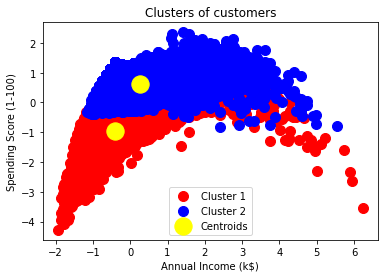

In [28]:
plt.scatter(X[labels_kmeans == 0, 0], X[labels_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels_kmeans == 1, 0], X[labels_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(centers[:, 0], centers[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Obs y')
plt.ylabel('Obs x')
plt.legend()
plt.show()

# EM without PCA

In [29]:
from sklearn.mixture import GaussianMixture
# Create a Gaussian Mixture model with 5 components
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the model to the time series data
gmm.fit(X)

# Get the cluster labels for each time series
labels_em = gmm.predict(X)

# Get the means and covariances of the components
means = gmm.means_
covariances = gmm.covariances_

In [30]:
silhouette_score(X, labels_em)

0.19344973219102501

# Hierarchical Clustering (before PCA)

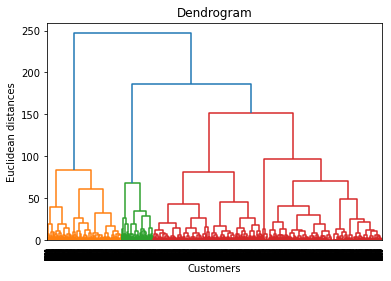

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels_hc = hc.fit_predict(X)

In [35]:
silhouette_score(X, labels_hc)

0.3292203610739338

# DBSCAN (before PCA)

In [58]:
from sklearn.cluster import DBSCAN
# eps is epsilon the starting point, and min_samples is the minimum points that must
# exist for cluster to be formed
dbscan = DBSCAN(eps=2, min_samples=300).fit(X)
labels = dbscan.labels_

# Print the data and the number of clusters
print(f'The number of clusters is: {len(set(labels_db))}')

The number of clusters is: 2


In [59]:
silhouette_score(X, labels_db)

0.4762917279518838

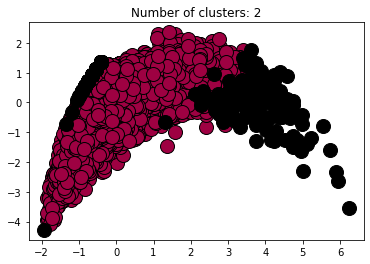

In [61]:
import numpy as np
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # noise points in black
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    plt.title('Number of clusters: {}'.format(2))

plt.show()

# Anomaly detection using Isolation Forest

In [120]:
X = graph_features_df.values

In [121]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)
isolation_forest.fit(X)
inliers_X = X[isolation_forest.predict(X) == 1]
inliers_y = y[isolation_forest.predict(X) == 1]

In [129]:
inliers_X.shape

(8666, 10)

# Kmeans without Anomalies

In [122]:
# Apply the KMeans algorithm to the  data
km = KMeans(n_clusters = 2, random_state = 0)
labels_kmeans = km.fit_predict(inliers_X)

In [123]:
silhouette_score(inliers_X, labels_kmeans)

0.35381292496958816

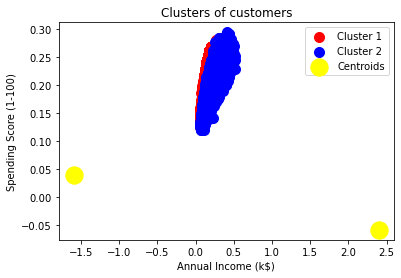

In [128]:
plt.scatter(inliers_X[labels_kmeans == 0, 0], inliers_X[labels_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(inliers_X[labels_kmeans == 1, 0], inliers_X[labels_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(centers[:, 0], centers[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# EM without Anomalies

In [130]:
from sklearn.mixture import GaussianMixture
# Create a Gaussian Mixture model with 5 components
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the model to the time series data
gmm.fit(inliers_X)

# Get the cluster labels for each time series
labels_em = gmm.predict(inliers_X)

# Get the means and covariances of the components
means = gmm.means_
covariances = gmm.covariances_

In [132]:
silhouette_score(inliers_X, labels_em)

0.24052303304330808

# Hierarchical Clustering (without Anomalies)

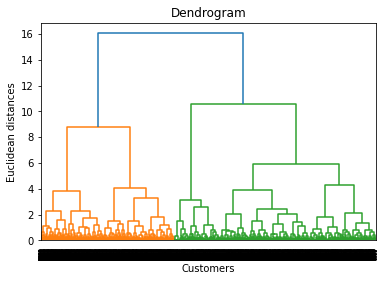

In [135]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(inliers_X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Obs')
plt.ylabel('Euclidean distances')
plt.show()

In [136]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels_hc = hc.fit_predict(inliers_X)

In [137]:
silhouette_score(inliers_X, labels_hc)

0.3153883795801926

# DBSCAN (without Anomalies)

In [149]:
from sklearn.cluster import DBSCAN
# eps is epsilon the starting point, and min_samples is the minimum points that must
# exist for cluster to be formed
dbscan = DBSCAN(eps=0.05, min_samples=10).fit(inliers_X)
labels = dbscan.labels_

# Print the data and the number of clusters
print(f'The number of clusters is: {len(set(labels))}')

The number of clusters is: 2


In [150]:
silhouette_score(inliers_X, labels)

0.3153883795801926

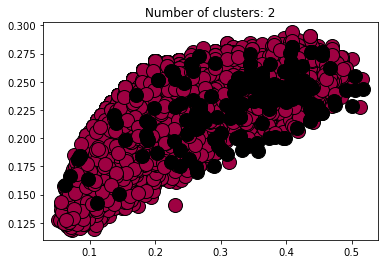

In [152]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # noise points in black
    class_member_mask = (labels == k)
    xy = inliers_X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    plt.title('Number of clusters: {}'.format(2))

plt.show()

# After PCA

In [62]:
X.shape

(9629, 10)

((9629, 2), (9629, 1))

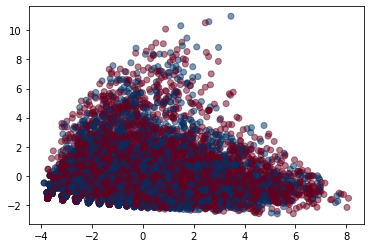

In [65]:
import sklearn as skl
X = skl.decomposition.PCA(n_components=2).fit_transform(X)
y = graph_label.loc[:,['target']].values

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
X.shape, y.shape

# Kmeans with PCA

In [67]:
# Apply the KMeans algorithm to the  data
km = KMeans(n_clusters = 2, random_state = 0)
labels_kmeans = km.fit_predict(X)

In [68]:
silhouette_score(X, labels_kmeans)

0.4188206015992654

In [69]:
# Get the cluster labels and centers
labels = km.labels_
centers = km.cluster_centers_

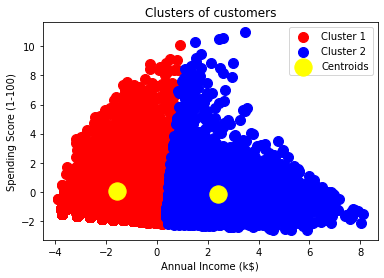

In [70]:
plt.scatter(X[labels_kmeans == 0, 0], X[labels_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels_kmeans == 1, 0], X[labels_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(centers[:, 0], centers[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# EM with PCA

In [72]:
from sklearn.mixture import GaussianMixture
# Create a Gaussian Mixture model with 5 components
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the model to the time series data
gmm.fit(X)

# Get the cluster labels for each time series
labels_em = gmm.predict(X)

# Get the means and covariances of the components
means = gmm.means_
covariances = gmm.covariances_

In [73]:
silhouette_score(X, labels_em)

0.29716715297824137

# EM with alternating maximization (after PCA)

In [76]:
# Initialize cluster centers randomly
centers = np.random.randn(2, X.shape[1])

# Run the Expectation-Maximization algorithm with alternating maximization
for i in range(10):
    # Expectation step
    dist = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
    membership = np.argmin(dist, axis=1)
    
    # Maximization step
    for j in range(2):
        centers[j] = np.mean(X[membership == j], axis=0)

In [77]:
# without alt max to verify results
silhouette_score(X, membership)

0.41900376433390313

# Hierarchical Clustering with PCA

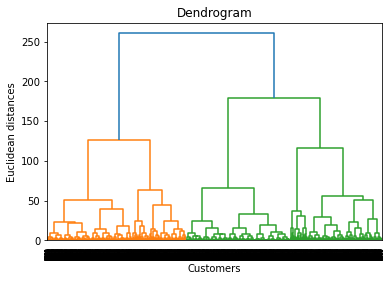

In [78]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels_hc = hc.fit_predict(X)

In [81]:
silhouette_score(X, labels_hc)

0.3799901823185064

# DBSCAN with PCA

In [116]:
from sklearn.cluster import DBSCAN
# eps is epsilon the starting point, and min_samples is the minimum points that must
# exist for cluster to be formed
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = dbscan.labels_

# Print the data and the number of clusters
print(f'The number of clusters is: {len(set(labels))}')

The number of clusters is: 2


In [117]:
silhouette_score(X, labels)

0.5606872732410954

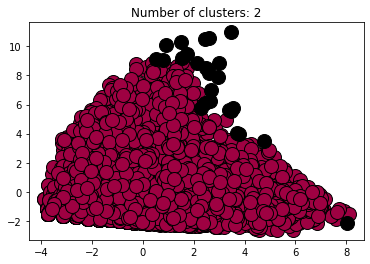

In [118]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # noise points in black
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    plt.title('Number of clusters: {}'.format(2))

plt.show()